In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import matplotlib.font_manager as fm
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter

from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


# 4. 1인가구의 거주 종류와 점유 유형을 바탕으로 규모별 가격지수와 비교


In [ ]:
one_person = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/raw데이터/거처의_종류별_사용방수별_점유형태별_1인가구_일반가구_시군구_20220122233423.xlsx', index_col=[0,1],header=0)

In [ ]:
one_person = one_person.swapaxes(axis1=0,axis2=1)
one_person = one_person['서울특별시']


In [ ]:
one_person

거처의종류별,계,주택,단독주택,아파트,연립주택,다세대주택,비거주용 건물 내 주택,주택이외의 거처
1인가구,1390701,1164111,537449,311384,21635,250470,43173,226590
자기집,295813,272382,61864,128484,10283,68184,3567,23431
전세(월세 없음),380876,321911,146734,72212,5596,85593,11776,58965
보증금 있는 월세,603837,497532,289304,95070,4474,85534,23150,106305
"무상(관사, 사택 등)",45562,36838,15758,12063,904,6918,1195,8724


- 서울시의 1인가구 비율이 증가하고 있음을 지금까지 알아보았음. 그럼 그 1인 가구의 거주형태는 어떻고, 어느방법으로 거주하고 있는지를 알아보기.

In [ ]:
apt_index_size_deal = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/규모별_매매가격지수_아파트.xlsx',index_col=0,header=[0,1])
apt_index_size_charter = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/규모별_전세가격지수_아파트.xlsx',index_col=0,header=[0,1])
apt_index_size_rent = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/규모별_월세가격지수_아파트.xlsx',index_col=0,header=[0,1])

df_house_index_size_deal = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/규모별_매매가격지수_연립다세대.xlsx', index_col=0, header=[0,1])
df_house_index_size_charter = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/규모별_전세가격지수_연립다세대.xlsx', index_col=0, header=[0,1])
df_house_index_size_rent = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/규모별_월세가격지수_연립다세대.xlsx', index_col=0, header=[0,1])

In [ ]:
house_deal = df_house_index_size_deal['서울특별시']
house_charter = df_house_index_size_charter['서울특별시']
house_rent = df_house_index_size_rent['서울특별시']

In [ ]:
house_rent.head(1)

규모,40㎡이하,40㎡초과 ~ 60㎡이하,60㎡초과 ~ 85㎡이하,85㎡초과
2015-06-01,0.0,99.394305,99.742161,100.005228


In [ ]:
apt_index_size_deal = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/규모별_매매가격지수_아파트.xlsx',index_col=0,header=[0,1])
apt_index_size_charter = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/규모별_전세가격지수_아파트.xlsx',index_col=0,header=[0,1])
apt_index_size_rent = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/규모별_월세가격지수_아파트.xlsx',index_col=0,header=[0,1])

In [ ]:
avg_deal_apt = apt_index_size_deal['서울특별시']
avg_charter_apt = apt_index_size_charter['서울특별시']
avg_rent_apt = apt_index_size_rent['서울특별시']

In [ ]:
avg_deal_apt.head(1)

규모,40㎡이하,40㎡초과 ~ 60㎡이하,60㎡초과 ~ 85㎡이하,85㎡초과 ~ 102㎡이하,102㎡초과 ~ 135㎡이하,135㎡초과
2012-01-01,0.0,86.476065,92.831743,92.974395,101.971484,107.671253


#### 아파트 규모별 가격지수

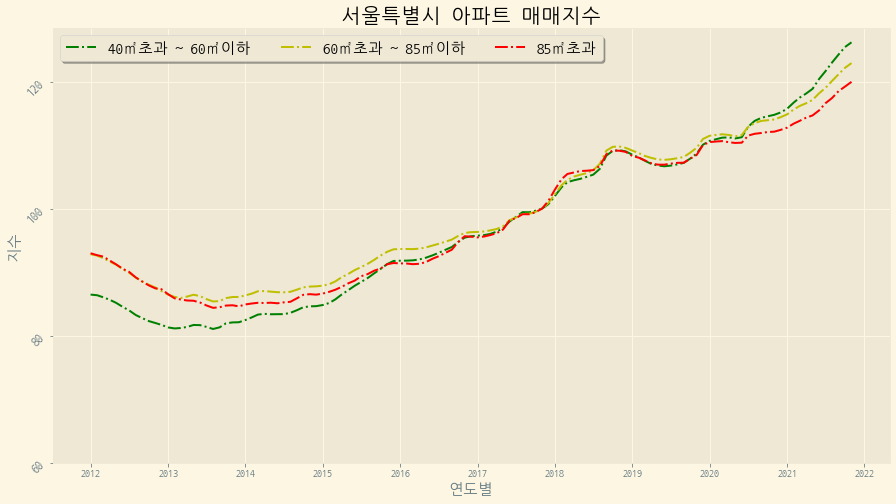

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.style.use('Solarize_Light2')
plt.title('서울특별시 아파트 매매지수', fontsize=20) 

plt.plot(avg_deal_apt['40㎡초과 ~ 60㎡이하'], 'g-.', label='40㎡초과 ~ 60㎡이하')
plt.plot(avg_deal_apt['60㎡초과 ~ 85㎡이하'], 'y-.', label='60㎡초과 ~ 85㎡이하')
plt.plot(avg_deal_apt['85㎡초과 ~ 102㎡이하'], 'r-.', label='85㎡초과')


plt.legend(loc='best', ncol=3, fontsize=15,  frameon=True, shadow=True)


plt.xlabel('연도별', fontsize=15)
plt.ylabel('지수', fontsize=15)   
plt.yticks(range(60,140,20),rotation=45, fontsize=12)
plt.grid(True)

plt.show()

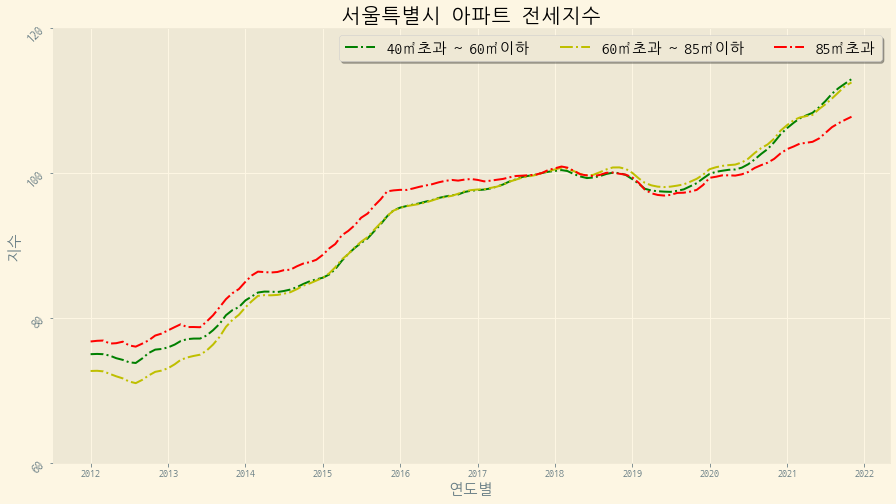

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.style.use('Solarize_Light2')
plt.title('서울특별시 아파트 전세지수', fontsize=20) 

plt.plot(avg_charter_apt['40㎡초과 ~ 60㎡이하'], 'g-.', label='40㎡초과 ~ 60㎡이하')
plt.plot(avg_charter_apt['60㎡초과 ~ 85㎡이하'], 'y-.', label='60㎡초과 ~ 85㎡이하')
plt.plot(avg_charter_apt['85㎡초과 ~ 102㎡이하'], 'r-.', label='85㎡초과')


plt.legend(loc='best', ncol=3, fontsize=15,  frameon=True, shadow=True)


plt.xlabel('연도별', fontsize=15)
plt.ylabel('지수', fontsize=15)   
plt.yticks(range(60,140,20),rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.grid(True)

plt.show()

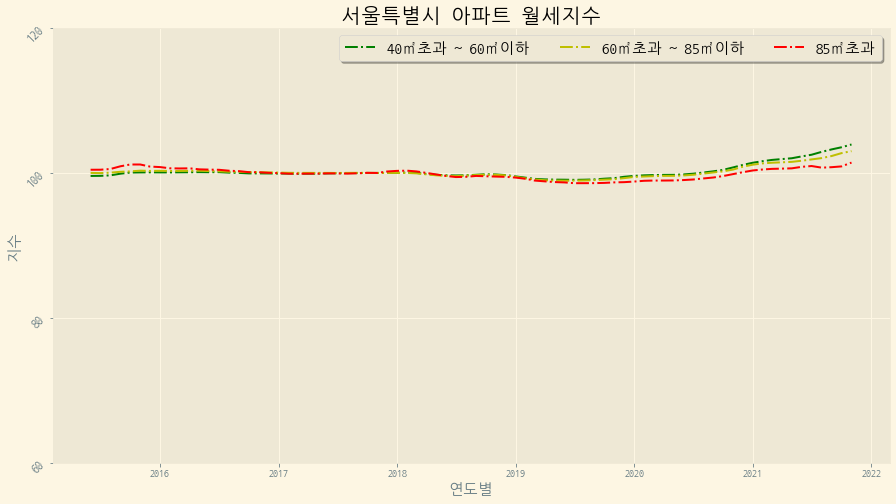

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.style.use('Solarize_Light2')
plt.title('서울특별시 아파트 월세지수', fontsize=20) 

plt.plot(avg_rent_apt['40㎡초과 ~ 60㎡이하'], 'g-.', label='40㎡초과 ~ 60㎡이하')
plt.plot(avg_rent_apt['60㎡초과 ~ 85㎡이하'], 'y-.', label='60㎡초과 ~ 85㎡이하')
plt.plot(avg_rent_apt['85㎡초과 ~ 102㎡이하'], 'r-.', label='85㎡초과')


plt.legend(loc='best', ncol=3, fontsize=15,  frameon=True, shadow=True)


plt.xlabel('연도별', fontsize=15)
plt.ylabel('지수', fontsize=15)   
plt.yticks(range(60,140,20),rotation=45, fontsize=12)
plt.grid(True)

plt.show()

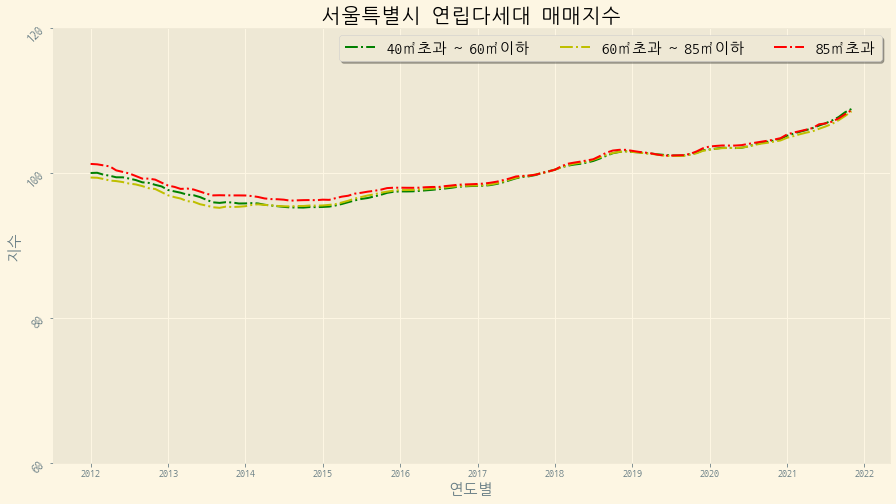

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.style.use('Solarize_Light2')
plt.title('서울특별시 연립다세대 매매지수', fontsize=20) 

plt.plot(house_deal['40㎡초과 ~ 60㎡이하'], 'g-.', label='40㎡초과 ~ 60㎡이하')
plt.plot(house_deal['60㎡초과 ~ 85㎡이하'], 'y-.', label='60㎡초과 ~ 85㎡이하')
plt.plot(house_deal['85㎡초과'], 'r-.', label='85㎡초과')


plt.legend(loc='best', ncol=3, fontsize=15,  frameon=True, shadow=True)


plt.xlabel('연도별', fontsize=15)
plt.ylabel('지수', fontsize=15)   

plt.yticks(range(60,140,20),rotation=45, fontsize=12)
plt.grid(True)

plt.show()

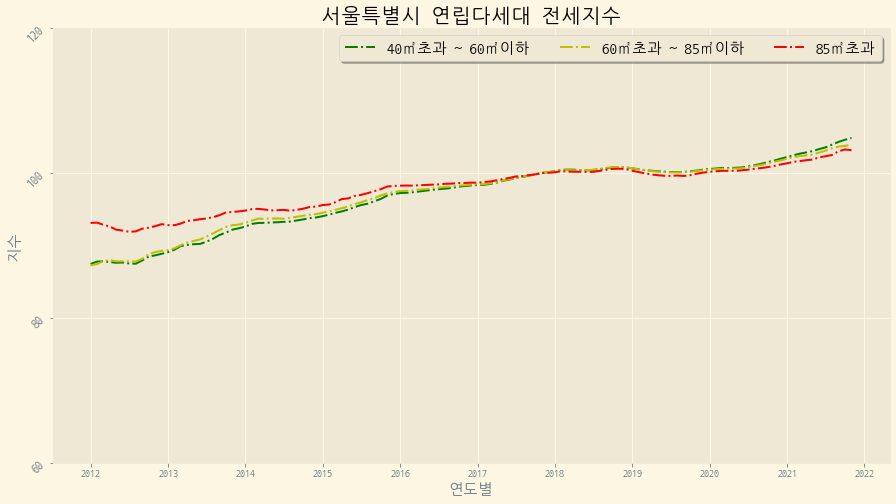

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.style.use('Solarize_Light2')
plt.title('서울특별시 연립다세대 전세지수', fontsize=20) 

plt.plot(house_charter['40㎡초과 ~ 60㎡이하'], 'g-.', label='40㎡초과 ~ 60㎡이하')
plt.plot(house_charter['60㎡초과 ~ 85㎡이하'], 'y-.', label='60㎡초과 ~ 85㎡이하')
plt.plot(house_charter['85㎡초과'], 'r-.', label='85㎡초과')


plt.legend(loc='best', ncol=3, fontsize=15,  frameon=True, shadow=True)


plt.xlabel('연도별', fontsize=15)
plt.ylabel('지수', fontsize=15)   

plt.yticks(range(60,140,20),rotation=45, fontsize=12)
plt.grid(True)

plt.show()

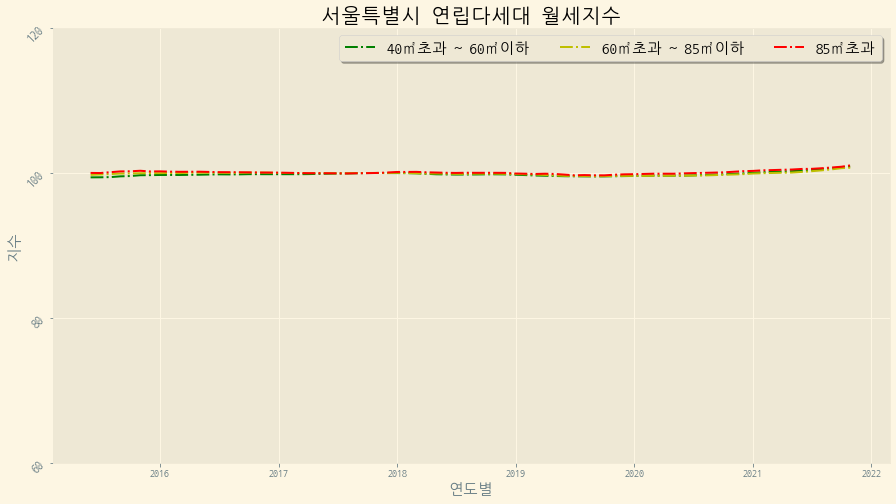

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.style.use('Solarize_Light2')
plt.title('서울특별시 연립다세대 월세지수', fontsize=20) 

plt.plot(house_rent['40㎡초과 ~ 60㎡이하'], 'g-.', label='40㎡초과 ~ 60㎡이하')
plt.plot(house_rent['60㎡초과 ~ 85㎡이하'], 'y-.', label='60㎡초과 ~ 85㎡이하')
plt.plot(house_rent['85㎡초과'], 'r-.', label='85㎡초과')


plt.legend(loc='best', ncol=3, fontsize=15,  frameon=True, shadow=True)


plt.xlabel('연도별', fontsize=15)
plt.ylabel('지수', fontsize=15)   
plt.yticks(range(60,140,20),rotation=45, fontsize=12)
plt.grid(True)

plt.show()

####연립다세대 가격지수

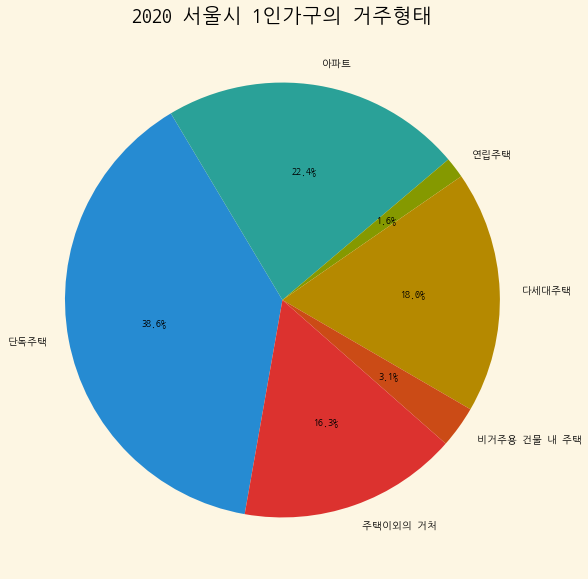

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.style.use('Solarize_Light2')
plt.title('2020 서울시 1인가구의 거주형태', fontsize=20) 

ratio = one_person.head(1).drop(labels=['계','주택'],axis=1)
labels = one_person.columns[2:8]
colors = ['yellow', 'red', 'blue', 'gray', 'green', 'silver','brown','ivory']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

- 1인가구 증가에 따른 건설사들의 초소형 아파트 공급에 적극적, 아파트의 부동산 가치에 대한 기대감 반영

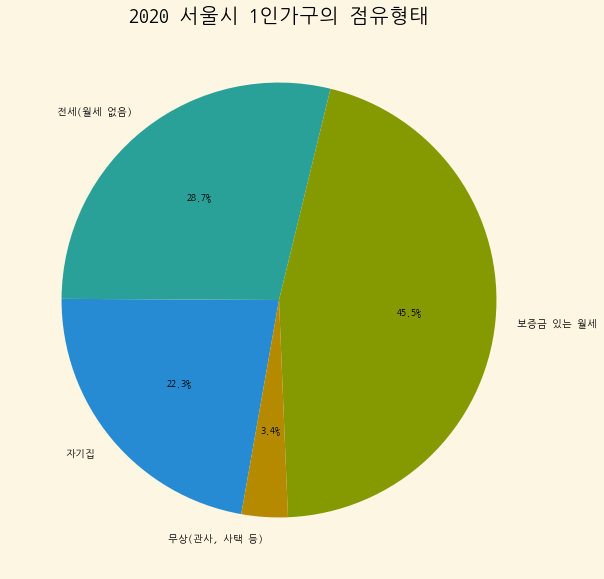

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.style.use('Solarize_Light2')
plt.title('2020 서울시 1인가구의 점유형태', fontsize=20) 

ratio = one_person['계'][1:5]
labels = one_person['계'][1:5].index
colors = ['yellow', 'red', 'blue', 'gray', 'green', 'silver','brown','ivory']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

- 자가비율이 높지 않은 이유는 2인이상 가구에 비해 주택에 대한 소유의지가 크지 않고 주택가격이 높아 구매가 어려운 것도 원인으로 생각됨

In [ ]:
one_person

거처의종류별,계,주택,단독주택,아파트,연립주택,다세대주택,비거주용 건물 내 주택,주택이외의 거처
1인가구,1390701,1164111,537449,311384,21635,250470,43173,226590
자기집,295813,272382,61864,128484,10283,68184,3567,23431
전세(월세 없음),380876,321911,146734,72212,5596,85593,11776,58965
보증금 있는 월세,603837,497532,289304,95070,4474,85534,23150,106305
"무상(관사, 사택 등)",45562,36838,15758,12063,904,6918,1195,8724


# 5. 결론

In [ ]:
apt_price_index = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/월간_매매가격지수_아파트.xlsx', index_col=0)

In [ ]:
apt_supply_deal = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/월간_매매수급동향_아파트.csv',index_col=0)
apt_supply_charter = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/월간_전세수급동향_아파트.csv',index_col=0)
apt_supply_rent = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/월간_월세수급동향_아파트.csv',index_col=0)

house_supply_deal = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/월간_매매수급동향_연립다세대.csv',index_col=0)
house_supply_charter = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/월간_전세수급동향_연립다세대.csv',index_col=0)
house_supply_rent = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/월간_월세수급동향_연립다세대.csv',index_col=0)

In [ ]:
apt_supply = apt_supply_deal[['서울특별시']].swapaxes(axis1=0,axis2=1)
apt_supply = apt_supply.append(apt_supply_charter[['서울특별시']].swapaxes(axis1=0,axis2=1))
apt_supply = apt_supply.append(apt_supply_rent[['서울특별시']].swapaxes(axis1=0,axis2=1))
apt_supply = apt_supply.swapaxes(axis1=0,axis2=1)
apt_supply.set_axis(labels=['아파트 매매','아파트 전세', '아파트 월세'], axis=1, inplace=True)
apt_supply.head(1)

,아파트 매매,아파트 전세,아파트 월세
2012-07-01,68.413856,102.461258,NaN


In [ ]:
house_supply = house_supply_deal[['서울특별시']].swapaxes(axis1=0,axis2=1)
house_supply = house_supply.append(house_supply_charter[['서울특별시']].swapaxes(axis1=0,axis2=1))
house_supply = house_supply.append(house_supply_rent[['서울특별시']].swapaxes(axis1=0,axis2=1))
house_supply = house_supply.swapaxes(axis1=0,axis2=1)
house_supply.set_axis(labels=['연립다세대 매매','연립다세대 전세', '연립다세대 월세'], axis=1, inplace=True)
house_supply.head(1)

,연립다세대 매매,연립다세대 전세,연립다세대 월세
2012-07-01,71.834416,111.931818,NaN


In [ ]:
apt_supply.index = pd.to_datetime(apt_supply.index, format='%Y-%m')
house_supply.index = pd.to_datetime(house_supply.index, format='%Y-%m')

In [ ]:
trading = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/전처리/주택유형별_주택거래현황_20220122213345.xlsx',index_col=0,header=[0,1])

In [ ]:
trade_seoul = trading['서울특별시']

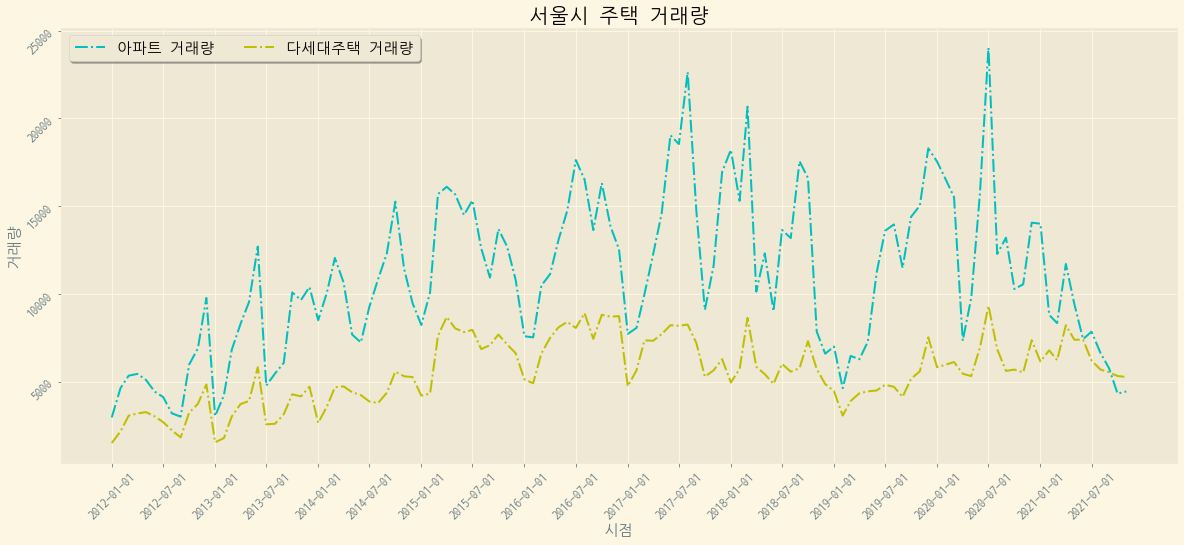

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.title('서울시 주택 거래량', fontsize=20) 

plt.plot(trade_seoul['서울 아파트'], 'c-.', label='아파트 거래량')
plt.plot(trade_seoul['서울 다세대주택'], 'y-.', label='다세대주택 거래량')

plt.legend(loc='best', ncol=3, fontsize=15,  frameon=True, shadow=True)

plt.xlabel('시점', fontsize=15)
plt.ylabel('거래량', fontsize=15)   
plt.xticks(ticks=trade_seoul.index, rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.locator_params(axis='x', nbins=len(month_marrigage.index)/12)
plt.grid(True)

plt.show()

##거래현황
- 주택담보·전세·마통… 부동산 대출중단 도미노 https://www.chosun.com/economy/economy_general/2021/08/21/AQIFCZYDZFGZZH2XNTMGECJOUU/
- 서울 아파트 매매수급지수 2년 5개월 만에 최저치
https://www.asiatoday.co.kr/view.php?key=20220121010012607
- 서울 전세수급지수 2년4개월만 최저… https://newsis.com/view/?id=NISX20220120_0001731928&cID=10401&pID=10400

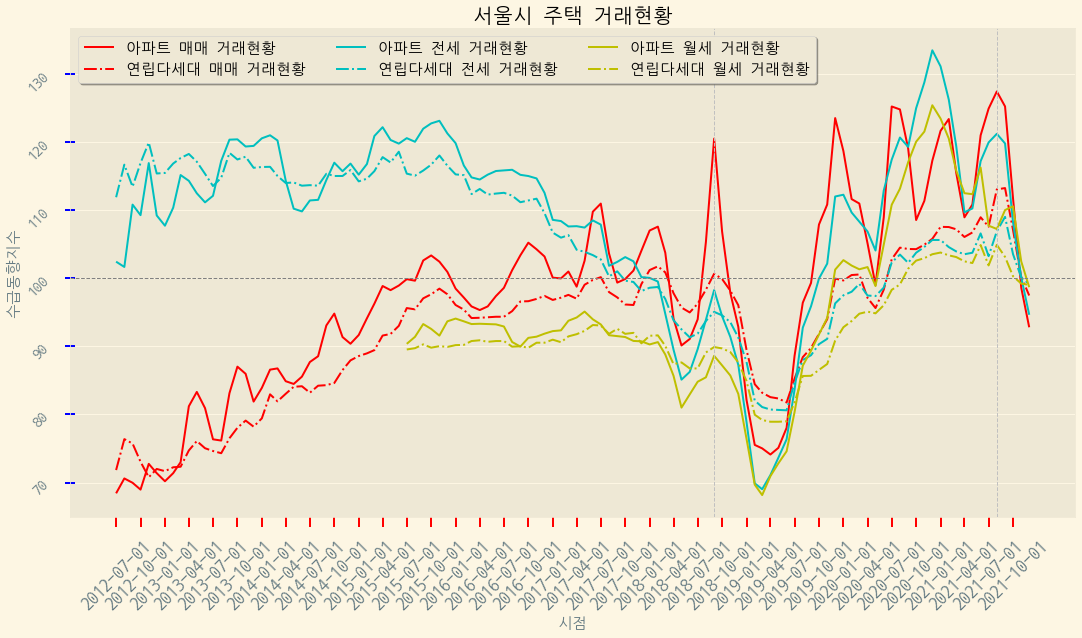

In [ ]:
fig = plt.figure(figsize=(18,9))
plt.style.use('Solarize_Light2')
plt.title('서울시 주택 거래현황', fontsize=20) 

plt.plot(apt_supply['아파트 매매'], 'r-', label='아파트 매매 거래현황')
plt.plot(house_supply['연립다세대 매매'], 'r-.', label='연립다세대 매매 거래현황')

plt.plot(apt_supply['아파트 전세'], 'c-', label='아파트 전세 거래현황')
plt.plot(house_supply['연립다세대 전세'], 'c-.', label='연립다세대 전세 거래현황')

plt.plot(apt_supply['아파트 월세'], 'y-', label='아파트 월세 거래현황')
plt.plot(house_supply['연립다세대 월세'], 'y-.', label='연립다세대 월세 거래현황')

plt.legend(loc='best', ncol=3, fontsize=15,  frameon=True, shadow=True)

plt.xlabel('시점', fontsize=15)
plt.ylabel('수급동향지수', fontsize=15)   
plt.xticks(ticks=apt_supply.index, rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.locator_params(axis='x', nbins=len(apt_supply.index)/3)
plt.grid(False, axis='x')

plt.axhline(100, 0, 1, color='gray', linestyle='--', linewidth=1)
plt.axvline(apt_supply['2018-9'].index, 0, 1, color='silver', linestyle='--', linewidth=1)
plt.axvline(apt_supply['2021-8'].index, 0, 1, color='silver', linestyle='--', linewidth=1)
plt.tick_params(axis='x', direction='out', length=10, width=2, pad=10, labelsize=18, color='r')
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=15, width=2, color='b')

plt.show()

<Figure size 1080x720 with 0 Axes>

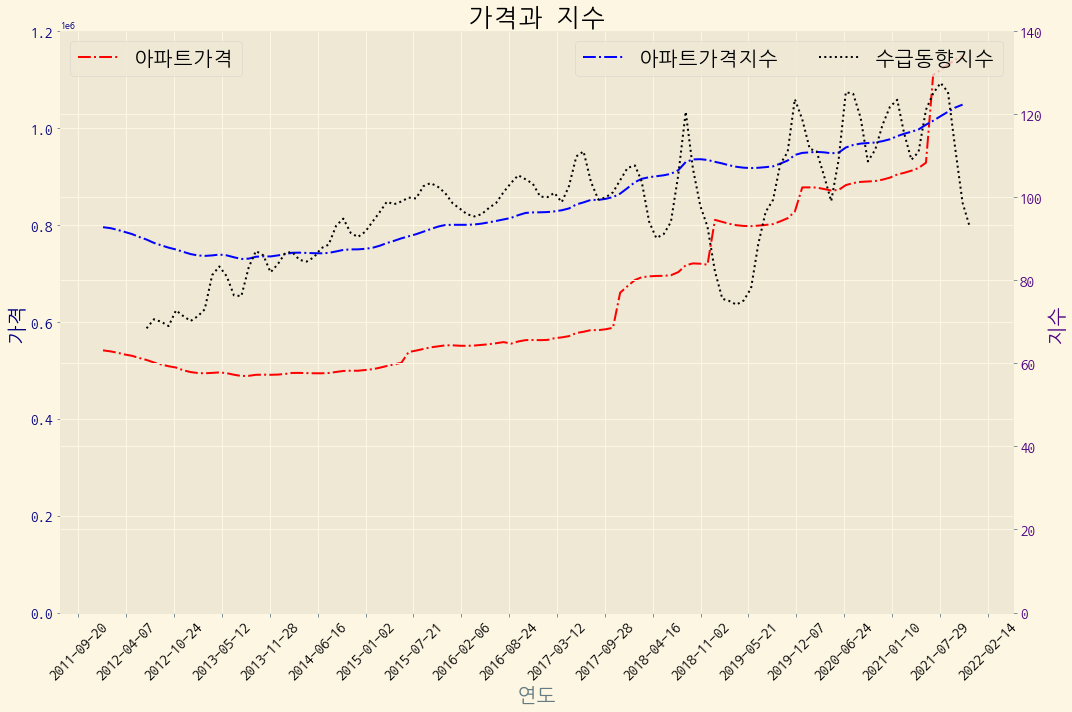

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()

ax1.set_title('가격과 지수', fontsize=25)
ax1.set_xlabel('연도', fontsize=20)
ax1.set_ylabel('가격', fontsize=20, color = 'navy')
ax2.set_ylabel('지수', fontsize=20, color = 'indigo')

line1 = ax1.plot(apt_avg_price_deal.index, apt_avg_price_deal['서울특별시'].values,'r-.' , label='아파트가격')
line1 = ax2.plot(apt_price_index.index, apt_price_index['서울특별시'].values, 'b-.' , label='아파트가격지수')
line2 = ax2.plot(apt_supply.index, apt_supply['아파트 매매'].values, 'k:', label='수급동향지수')


ax1.xaxis.set_major_locator(MaxNLocator(25))
ax1.set_ylim(0, 1200000, 100000)
ax2.set_ylim(0,140,10)
ax1.tick_params(axis='x', labelsize=15, labelcolor='black' , rotation=45)
ax1.tick_params(axis='y', labelsize=15, labelcolor='navy')
ax2.tick_params(axis='y', labelsize=15, labelcolor='indigo')

ax1.legend(loc = 'upper left', fontsize=20, ncol=4)
ax2.legend(loc = 'upper right', fontsize=20, ncol=4)

labels = ['0','2억','4억','6억','8억','10억','12억','14억','16억','18억','20억']
plt.tight_layout()
plt.grid(True)

plt.show()

- 2021년 8월 이후로 수급동향지수가 급격히 하락(지수 100을 기준으로 100보다 높으면 수요가 많고, 100보다 낮으면 공급이 많음을 의미).
- 3분기에 실시된 은행들의 부동산 대출중단 사태의 영향과 더불어 다가올 2022 대통령 선거를 앞두고 시장에서 관망, 금리인상
- 17년도 현정권 부임이후 주택 가격은 한번도 하락하지 않았음.
- 2018-09 9.21 정부의 부동산 공급 대책 및 신도시 발표 이후 수급동향지수가 급격히 하락했지만, 당시 부동산 가격에 큰 영향을 미치지 않았음.
- 일시적인 부동산 안정세인지 본격적인 안정세인지는 더 지켜봐야함

## 결론
- 17년도 이후 급격히 증가한 부동산 가격, 나날이 감소하는 혼인율, 출산율, 핵가족 시대에서 1인가구 시대로 넘어가는 현상황에 대해 주택가격을 중심으로 분석해 보았음. 
- 1인가구의 증가, 혼인율-출산율의 감소는 앞으로 고령화를 촉진, 노령인구 비율을 급속히 증가시킴
- 청장년층의 인구감소는 경제활동인구를 감소를 의미, 경기둔화를 일으킬 가능성이 있다.
- 앞서서 소형평수 대의 가격상승률은 혼인률-출생율감소로 인한 1인가구의 증가의 영향이 있었다고 볼 수 있음.
- 그러나 앞으로 청장년층의 감소와 노인인구의 증가로 인한 경제둔화, 금리인상과 같은 경제적 상황뿐만 아니라, 다양한 정책등과 같은 여러 요인들로 인해 1인가구의 증가가 무조건적으로 소형 평수의 가격이 지속적으로 상승한다고 볼 수 없음.
- 그래도 서울을 필두로 한 앞으로의 1인가구의 증가는 전국적으로 소형평수의 가격지수가 다른 평수대에 비해 높을 것이라 예상됨.

In [ ]:
future_population = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/raw데이터/주요_연령계층별_추계인구_생산연령인구__고령인구_등____전국_20220124153633.xlsx', index_col=0)
future_household = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/전처리/1인가구비율.xlsx', index_col=0)

In [ ]:
future_population.head(1)

,15-24세,25-49세,50-64세,65세 이상
시점,,,,
2000,16.4,42.2,13.2,7.2


In [ ]:
future_household = future_household.swapaxes(axis1=0,axis2=1)
future_household

행정구역별(시도),전국,서울특별시
2000,2255298,508761
2001,2438225,552135
2002,2628346,592715
2003,2818062,633317
2004,3001257,670410
2005,3185621,687124
2006,3377666,722482
2007,3571412,759713
2008,3766306,796953
2009,3963334,834678


<Figure size 1080x720 with 0 Axes>

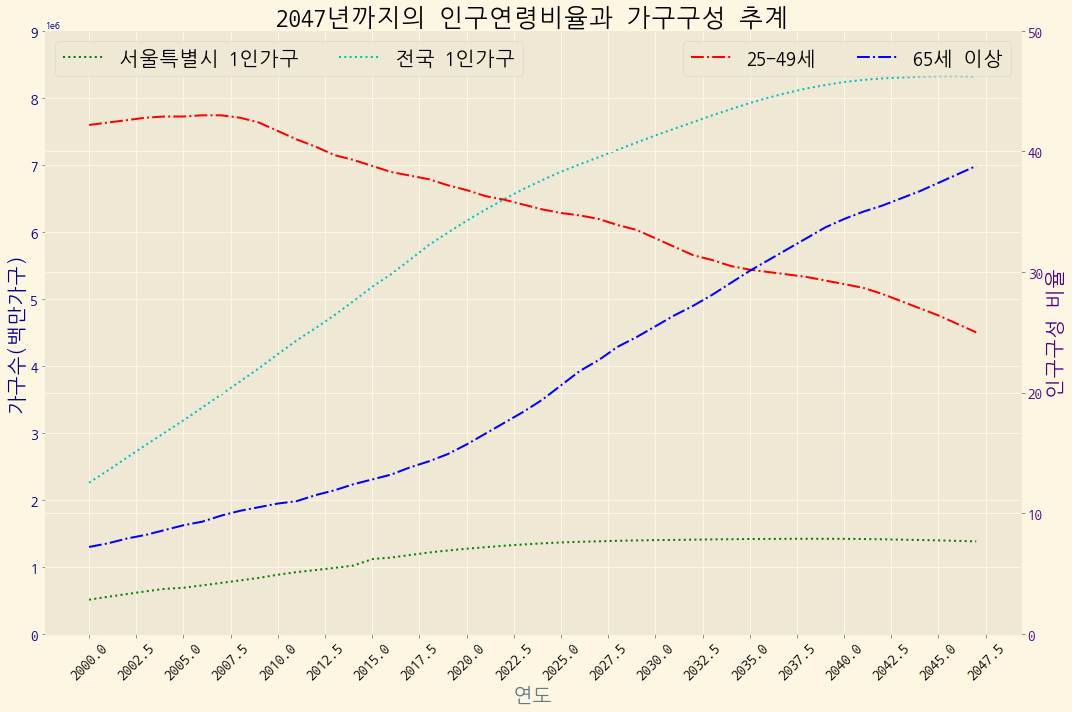

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()

ax1.set_title('2047년까지의 인구연령비율과 가구구성 추계', fontsize=25)
ax1.set_xlabel('연도', fontsize=20)
ax1.set_ylabel('가구수(백만가구)', fontsize=20, color = 'navy')
ax2.set_ylabel('인구구성 비율', fontsize=20, color = 'indigo')

line1 = ax2.plot(future_population.index, future_population['25-49세'].values,'r-.' , label='25-49세')
line2 = ax2.plot(future_population.index, future_population['65세 이상'].values, 'b-.' , label='65세 이상')
line3 = ax1.plot(future_household.index, future_household['서울특별시'].values, 'g:', label='서울특별시 1인가구')
line4 = ax1.plot(future_household.index, future_household['전국'].values, 'c:', label='전국 1인가구')

ax1.xaxis.set_major_locator(MaxNLocator(25))
ax1.set_ylim(0,9000000,1000000)
ax2.set_ylim(0, 50, 5)
ax1.tick_params(axis='x', labelsize=15, labelcolor='black' , rotation=45)
ax1.tick_params(axis='y', labelsize=15, labelcolor='navy')
ax2.tick_params(axis='y', labelsize=15, labelcolor='indigo')

ax1.legend(loc = 'upper left', fontsize=20, ncol=4)
ax2.legend(loc = 'upper right', fontsize=20, ncol=4)

labels = ['0','2억','4억','6억','8억','10억','12억','14억','16억','18억','20억']
plt.tight_layout()
plt.grid(True)

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from datetime import datetime
import datetime

In [ ]:
import folium
import json
geojson = json.load( open('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/seoulsigungu.geojson') )

In [ ]:
mpl.rc('font', family='NanumGothicCoding')